# Supply Chain Risk Analysis

> Identify high-risk suppliers based on performance metrics like delivery delays, defect rates, and external risk factors.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Data Loading and Initial Exploration

> Load the dataset and review key attributes for cleaning and analysis.

In [44]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/supply_chain_data.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [46]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## Data Cleaning

> Handle missing values

> Drop duplicates

> Standardize column formats

In [47]:
# Standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [48]:
# Checking for duplicates
duplicates = df.duplicated().sum()

# Checking for nulls
nulls = df.isnull().sum().sum()

print(f"Duplicates: {duplicates}")
print("Null Values:", nulls)

Duplicates: 0
Null Values: 0


In [49]:
# Checking data types
df.dtypes

,0
product_type,object
sku,object
price,float64
availability,int64
number_of_products_sold,int64
revenue_generated,float64
customer_demographics,object
stock_levels,int64
lead_times,int64
order_quantities,int64


In [50]:
# Inspect unique values in key categorical columns
categorical_cols = ['product_type', 'customer_demographics', 'shipping_carriers',
                    'supplier_name', 'location', 'inspection_results',
                    'transportation_modes', 'routes']

for col in categorical_cols:
    print(df[col].value_counts())
    print("--------------")

product_type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64
--------------
customer_demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64
--------------
shipping_carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64
--------------
supplier_name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64
--------------
location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64
--------------
inspection_results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64
--------------
transportation_modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64
--------------
routes
Route A    43
Route B    37
Route C    20
Name: count, dtype: int64
--------------


In [51]:
# Replacing 'Unknown' in customer_demographics with NaN
df['customer_demographics'] = df['customer_demographics'].replace('Unknown', pd.NA)

## EDA

> To understand the factors that may contribute to supplier risk, discover patterns, and prepare for future modeling or scoring.

In [52]:
df.describe()

,price,availability,number_of_products_sold,revenue_generated,stock_levels,lead_times,order_quantities,shipping_times,shipping_costs,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,defect_rates,costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


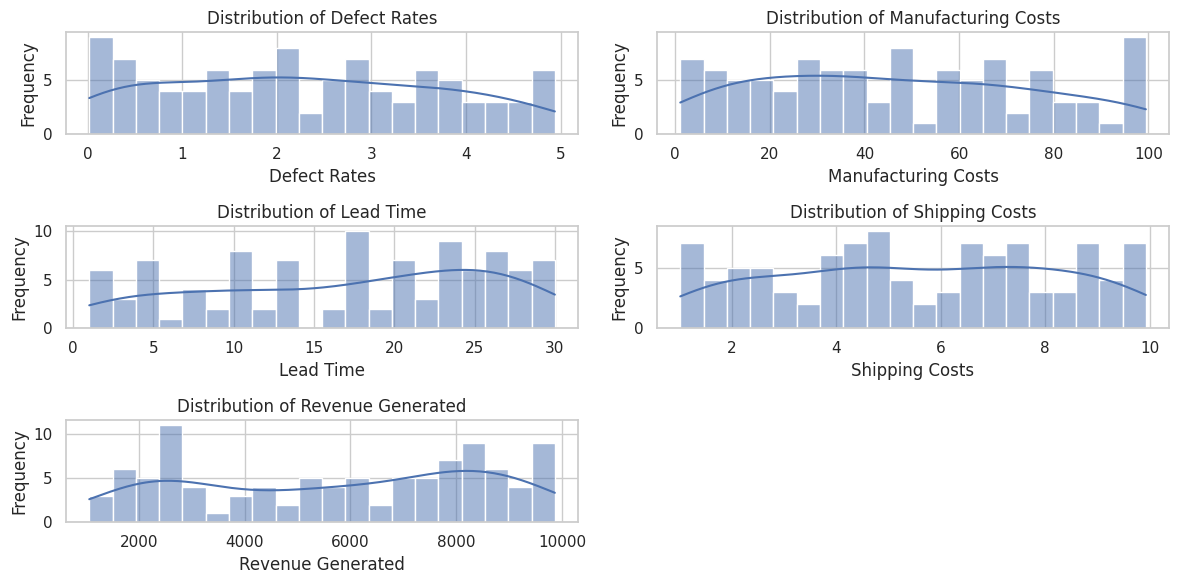

In [53]:
numeric_cols = ['defect_rates', 'manufacturing_costs',
                'lead_time', 'shipping_costs', 'revenue_generated']

rows = 3
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
axes = axes.flatten()  # Flatten to easily index

# Creating histograms in grid
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')

# Removing empty subplot if any
if len(numeric_cols) < len(axes):
    for j in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

* **Distribution of Defect Rates:** Most defect rates are skewed toward the lower end, indicating that the majority of products pass inspection with relatively few defects. However, a few suppliers still exhibit moderate to high defect rates (>3), which may require quality improvement actions.

* **Distribution of Manufacturing Costs:** Manufacturing costs are fairly uniformly distributed, with a slight peak at the higher end.

* **Distribution of Lead Time:** Lead times are spread across a broad range. This indicates inconsistency in supplier responsiveness and fulfillment.

* **Distribution of Shipping Costs:** Outliers exist at both low and high ends, indicating differences in shipping methods, regions, or carrier contracts.

* **Distribution of Revenue Generated:** Revenue distribution is right-skewed, with a concentration of lower revenue values and a long tail toward higher revenue. This implies a few high-performing suppliers drive most of the revenue.

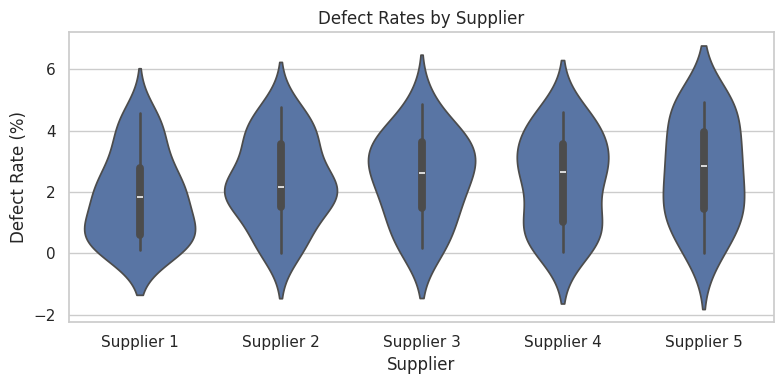

In [54]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='supplier_name', y='defect_rates', data=df,
                   order=['Supplier 1', 'Supplier 2', 'Supplier 3', 'Supplier 4', 'Supplier 5'])
plt.title('Defect Rates by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Defect Rate (%)')
plt.tight_layout()
plt.show()

* **Supplier 1:** Lowest and most consistent defect rates — best quality.

* **Supplier 2:** Moderate defects with some variation — monitor regularly.

* **Supplier 3:** Higher median defects — may need quality checks.

* **Supplier 4:** Broad defect spread — inconsistent performance.

* **Supplier 5:** Highly variable defects — quality is unreliable.

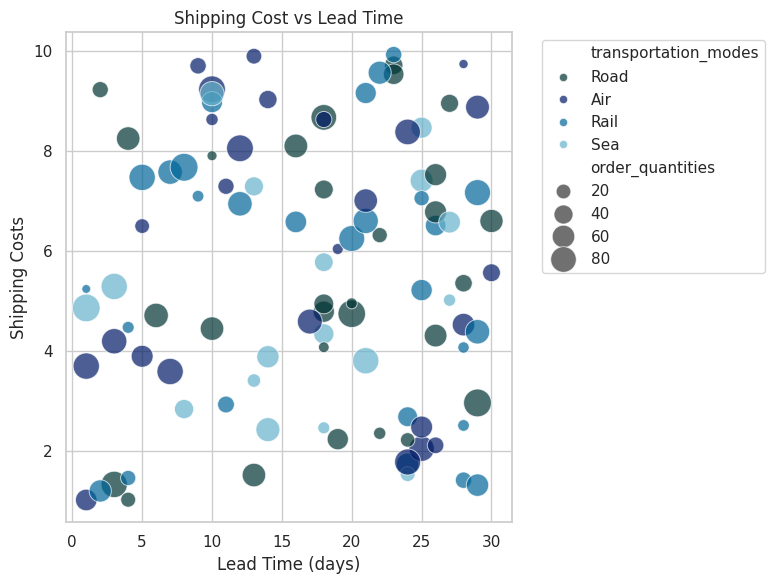

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lead_time', y='shipping_costs', size='order_quantities',
                hue='transportation_modes', palette='ocean', data=df, sizes=(40, 400),alpha=0.7)
plt.title('Shipping Cost vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Shipping Costs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* **Air transport** tends to have higher shipping costs, even with shorter lead times.

* **Sea shipments** show low cost, but often have **longer lead times**.

* **Road and Rail** are spread out, offering a mix of cost-efficiency and time.

* **Larger order quantities** are not strictly tied to any specific transport mode.

* There's no clear linear correlation between shipping cost and lead time across all modes.

## Feature Engineering


In [56]:
# Defect Risk Category
# Categorizing suppliers based on defect rates
def classify_defect_risk(rate):
    if rate < 2:
        return 'Low'
    elif 2 <= rate <= 4:
        return 'Medium'
    else:
        return 'High'

df['defect_risk_category'] = df['defect_rates'].apply(classify_defect_risk)

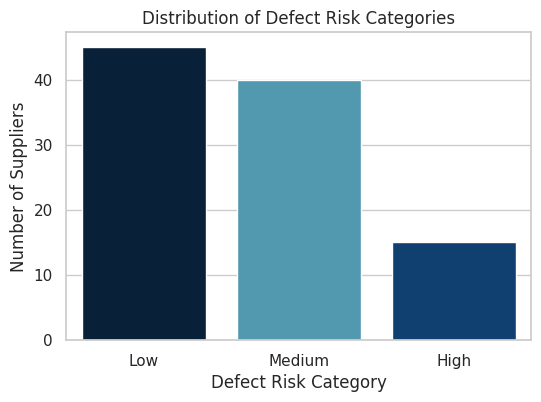

In [57]:
# Distribution of Defect Risk Categories
plt.figure(figsize=(6, 4))
sns.countplot(
    x='defect_risk_category',
    data=df,
    hue='defect_risk_category',
    palette='ocean',
    order=['Low', 'Medium', 'High']
)
plt.title('Distribution of Defect Risk Categories')
plt.xlabel('Defect Risk Category')
plt.ylabel('Number of Suppliers')
plt.show()

* **Low risk:** Majority of suppliers fall under this category.
* **Medium risk:** A significant number of suppliers are in this group.
* **High-risk:** Only few suppliers but it's critical and need monitoring.

In [58]:
# Shipping Efficiency Score
# A combined metric: lead_time * shipping_costs
df['shipping_efficiency_score'] = df['lead_time'] * df['shipping_costs']

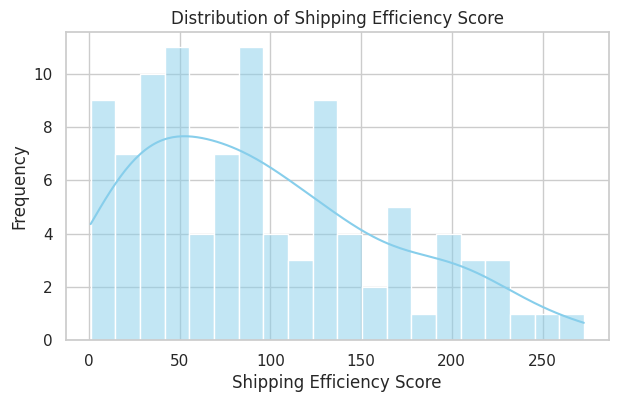

In [59]:
# Distribution of Shipping Efficiency Score
plt.figure(figsize=(7, 4))
sns.histplot(
    df['shipping_efficiency_score'],
    kde=True,
    bins=20,
    color='skyblue'
)
plt.title('Distribution of Shipping Efficiency Score')
plt.xlabel('Shipping Efficiency Score')
plt.ylabel('Frequency')
plt.show()

* The distribution is **right-skewed**, meaning:

  * **Majority of suppliers** have **low to moderate efficiency**.
  * **Fewer suppliers** reach **high efficiency**.
* The spread indicates not all suppliers are equally efficient.

In [60]:
# Inspection Pass Flag
# Binary flag from inspection results: 1 if Pass, else 0
df['inspection_pass_flag'] = df['inspection_results'].apply(
    lambda x: 1 if str(x).strip().lower() == 'pass' else 0
)

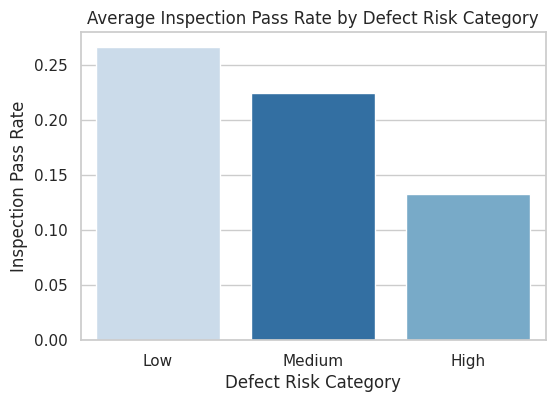

In [61]:
# Inspection Pass Rate by Defect Risk Category
plt.figure(figsize=(6, 4))
sns.barplot(
    x='defect_risk_category',
    y='inspection_pass_flag',
    data=df,
    order=['Low', 'Medium', 'High'],
    hue='defect_risk_category',
    palette='Blues',
    errorbar=None  # No error bars
)
plt.title('Average Inspection Pass Rate by Defect Risk Category')
plt.xlabel('Defect Risk Category')
plt.ylabel('Inspection Pass Rate')
plt.show()

* Low defect risk suppliers have the highest average inspection pass rate.

* Medium-risk suppliers perform moderately well.

* High-risk suppliers have the lowest inspection pass rate.

In [62]:
# Cost Per Unit
# Total cost per product = (manufacturing + shipping) / quantity
df['cost_per_unit'] = (
    (df['manufacturing_costs'] + df['shipping_costs']) / df['order_quantities']
)

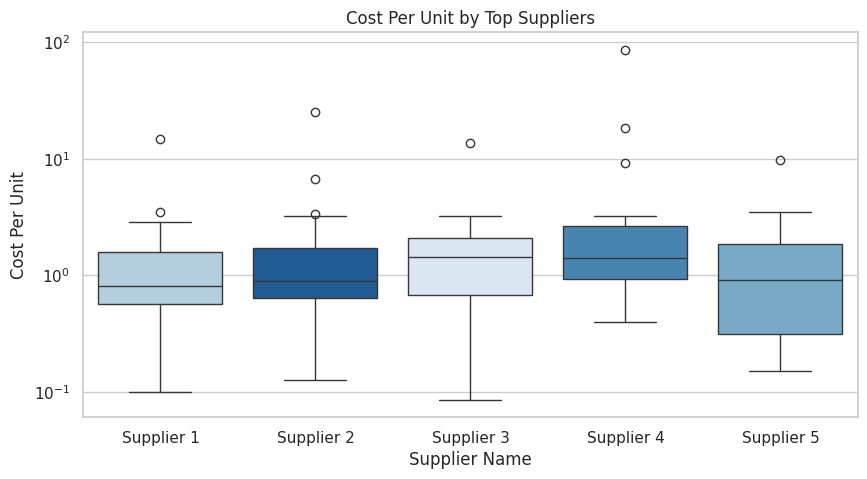

In [63]:
# Cost Per Unit by Top Suppliers
top_suppliers = df['supplier_name'].value_counts().head(10).index

plt.figure(figsize=(10, 5))
sns.boxplot(
    x='supplier_name',
    y='cost_per_unit',
    data=df[df['supplier_name'].isin(top_suppliers)],
    hue='supplier_name',
    order=['Supplier 1', 'Supplier 2', 'Supplier 3', 'Supplier 4', 'Supplier 5'],
    palette='Blues'
)
plt.yscale('log') # becaus of extreme outliers
plt.title('Cost Per Unit by Top Suppliers')
plt.xlabel('Supplier Name')
plt.ylabel('Cost Per Unit')
plt.show()

* **Supplier 1:** Low and stable costs with minimal outliers.
* **Supplier 2:** Low median cost but with moderate outliers, indicating occasional spikes.
* **Supplier 3:** Similar to Supplier 1, with slightly higher spread but fewer extreme values.
* **Supplier 4:** Highest variability and cost spikes—least cost-efficient.
* **Supplier 5:** Low costs, slightly more spread, but still relatively efficient.


Supplier 1 and 3 are consistent; Supplier 2 is economical with occasional spikes; Supplier 4 is risky cost-wise.


In [64]:
# Lead Time Risk
# Flaging if lead_time is considered risky (> 20 days)
df['lead_time_risk'] = df['lead_time'].apply(lambda x: 1 if x > 20 else 0)

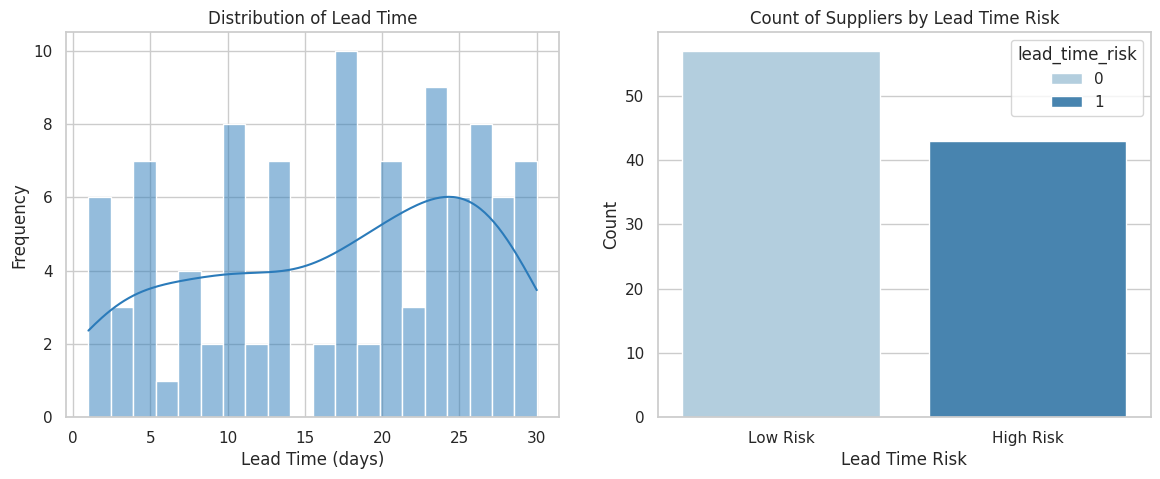

In [65]:
#Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Distribution of Lead Time
sns.histplot(
    df['lead_time'],
    kde=True,
    bins=20,
    color=sns.color_palette("Blues")[4],
    ax=axes[0]
)
axes[0].set_title('Distribution of Lead Time')
axes[0].set_xlabel('Lead Time (days)')
axes[0].set_ylabel('Frequency')

# Plot 2: Lead Time Risk Flag Count
sns.countplot(
    x='lead_time_risk',
    data=df,
    hue='lead_time_risk',
    palette=sns.color_palette("Blues", 2),
    ax=axes[1]
)
axes[1].set_title('Count of Suppliers by Lead Time Risk')
axes[1].set_xlabel('Lead Time Risk')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Low Risk', 'High Risk'])

plt.show()


**Distribution of Lead Time**

* Shows how many suppliers have different lead times.
* The distribution is **slightly right-skewed**, meaning more suppliers deliver quicker, but some take longer.

**Count of Suppliers by Lead Time Risk**

* **Low Risk (lead\_time\_risk = 0):** Majority of suppliers fall in this category.
* **High Risk (lead\_time\_risk = 1):** A significant number still pose risk due to longer or inconsistent lead times.


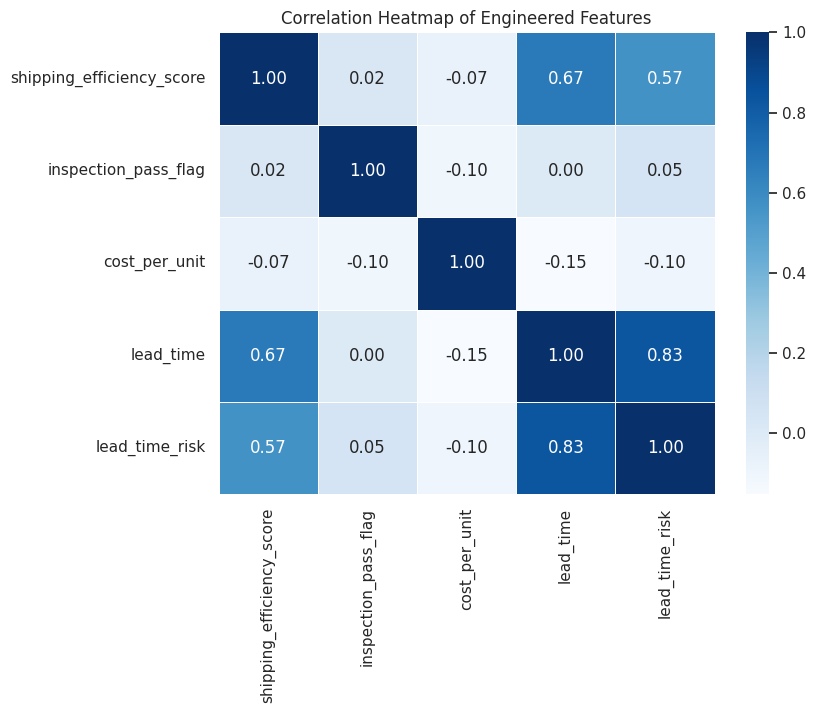

In [66]:
# Selecting numeric engineered features
engineered_numeric = df[[
    'shipping_efficiency_score',
    'inspection_pass_flag',
    'cost_per_unit',
    'lead_time',
    'lead_time_risk'
]]

# Correlation matrix
corr = engineered_numeric.corr()

# Ploting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Engineered Features')
plt.show()

## Risk Scoring

> A supplier risk score is a single numeric value (or category like "High", "Medium", "Low") that summarizes how risky a supplier is — based on factors like delays, defects, high costs, failed inspections, etc.

In [67]:
def map_defect_risk(category):
    return {'Low': 0, 'Medium': 1, 'High': 2}[category]

def normalize_column(col):
    return (col - col.min()) / (col.max() - col.min())  # Scale 0–1

In [68]:
# Computing components
df['defect_risk_score'] = df['defect_risk_category'].map(map_defect_risk)

df['cost_per_unit_norm'] = normalize_column(df['cost_per_unit'])

df['shipping_eff_score_norm'] = normalize_column(df['shipping_efficiency_score'])

| Feature                     | Risk Signal                     | Weight |
| --------------------------- | ------------------------------- | ---------------- |
| defect_risk_category      | High defects = high risk        | 3                |
| lead_time_risk            | Lead time > 20 days = risky     | 2                |
| inspection_pass_flag      | Fail/Pending = risky            | 2                |
| cost_per_unit             | High unit cost = less efficient | 1                |
| shipping_efficiency_score | High cost × delay = inefficient | 2                |


In [69]:
# Weighted risk score
df['supplier_risk_score'] = (
    df['defect_risk_score'] * 3 +
    df['lead_time_risk'] * 2 +
    (1 - df['inspection_pass_flag']) * 2 +
    df['cost_per_unit_norm'] * 1 +
    df['shipping_eff_score_norm'] * 2
)

In [70]:
# Top 10 highest risk
df[['supplier_name', 'supplier_risk_score']].sort_values(by='supplier_risk_score', ascending=False).head(10)

,supplier_name,supplier_risk_score
1,Supplier 3,11.650003
78,Supplier 5,11.567663
42,Supplier 5,11.453018
93,Supplier 4,11.081978
55,Supplier 2,11.025455
3,Supplier 5,10.304434
20,Supplier 1,9.899299
84,Supplier 5,9.478203
24,Supplier 2,9.291326
40,Supplier 1,8.977841


In [71]:
# Average risk score per supplier
df.groupby('supplier_name')['supplier_risk_score'].mean().sort_values(ascending=False)

,supplier_risk_score
supplier_name,
Supplier 5,5.931368
Supplier 4,5.631341
Supplier 2,5.614326
Supplier 3,5.517593
Supplier 1,4.016747


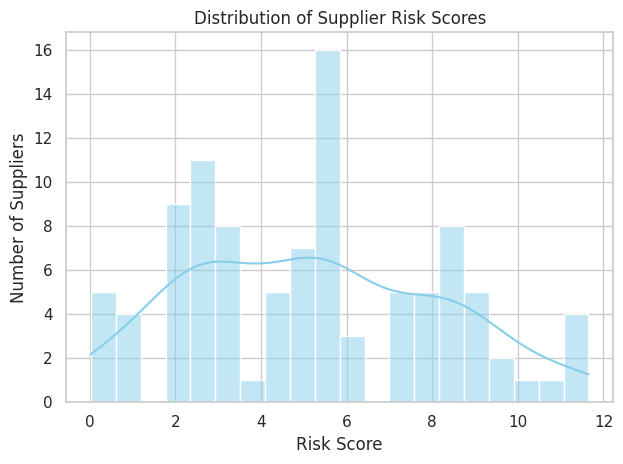

In [72]:
# Distribution plot of all risk scores
sns.histplot(df['supplier_risk_score'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Supplier Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Number of Suppliers")
plt.tight_layout()
plt.show()

Most suppliers have moderate risk scores, with a few showing very low or high risks.
The distribution is relatively even but slightly right-skewed.

In [73]:
def label_risk(score):
    if score < 2:
        return 'Low'
    elif 2 <= score < 4:
        return 'Medium'
    else:
        return 'High'

df['risk_level'] = df['supplier_risk_score'].apply(label_risk)

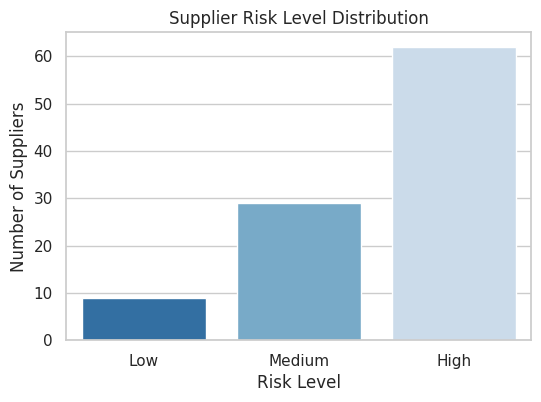

In [74]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(
    x='risk_level',
    data=df,
    order=['Low', 'Medium', 'High'],
    hue='risk_level',
    palette='Blues'
)
plt.title('Supplier Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Number of Suppliers')
plt.show()

Most suppliers fall into the high-risk category, with very few falling into low-risk category.
This shows some potential reliability concerns.

## Supplier Segmentation using KMeans

> Cluster suppliers into Low, Medium, and High risk using KMeans on the risk score.

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [76]:
# Numerical features to cluster on
features = [
    'defect_risk_score',
    'inspection_pass_flag',
    'lead_time_risk',
    'cost_per_unit_norm',
    'shipping_eff_score_norm'
]

X = df[features].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
# KMeans clustering (choosing k=3 for now)
kmeans = KMeans(n_clusters=3, random_state=42)
df['supplier_cluster'] = kmeans.fit_predict(X_scaled)

In [78]:
# Average profile of each cluster
cluster_summary = df.groupby('supplier_cluster')[features].mean().round(2)
cluster_summary

,defect_risk_score,inspection_pass_flag,lead_time_risk,cost_per_unit_norm,shipping_eff_score_norm
supplier_cluster,,,,,
0,0.94,0.06,1.00,0.02,0.53
1,0.43,1.00,0.43,0.01,0.31
2,0.64,0.00,0.00,0.05,0.23


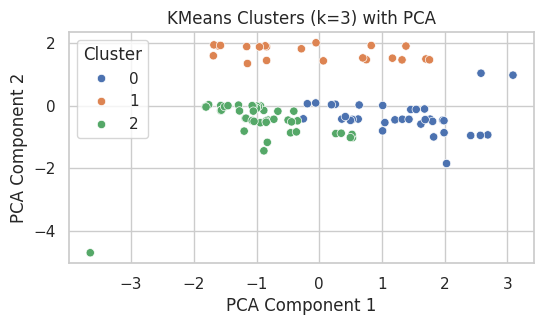

In [79]:
# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans again
kmeans_final = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Visualize
plt.figure(figsize=(6, 3))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="deep")
plt.title(f"KMeans Clusters (k={3}) with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


## Insights

> Visualizations of risk across regions and suppliers.

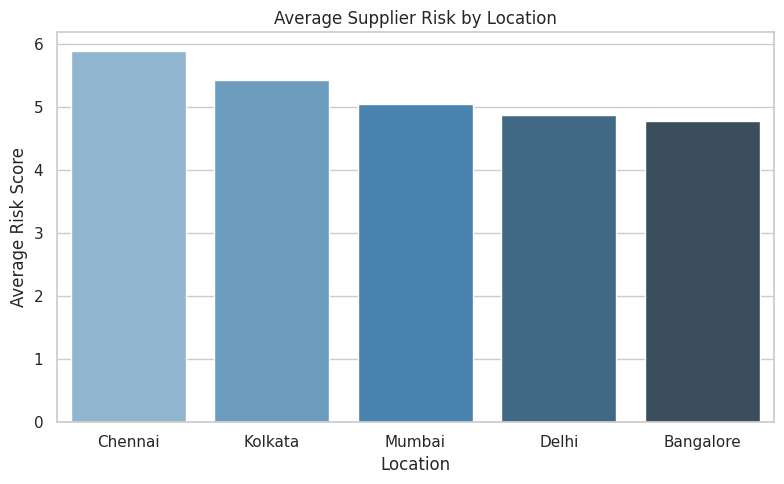

In [80]:
# Group by location
location_risk = df.groupby('location')['supplier_risk_score'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='location', y='supplier_risk_score', data=location_risk,
            hue='location', palette='Blues_d')
plt.title('Average Supplier Risk by Location')
plt.xlabel('Location')
plt.ylabel('Average Risk Score')
plt.tight_layout()
plt.show()

**Geographic risk concentration**

Chennai and Kolkata rank the highest after checking the average risk scores of all geographic locations and they need to focus and apply stricter control mesures on on those suppliers.

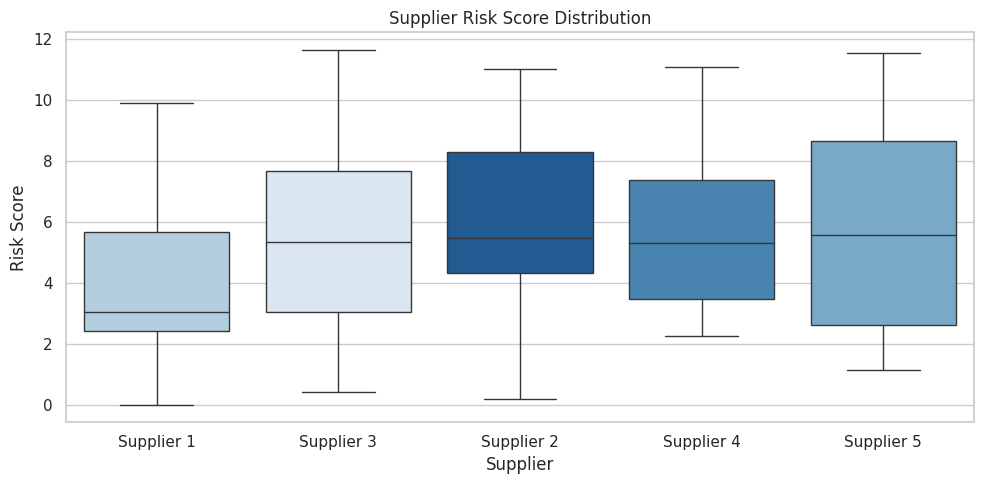

In [81]:
# Sort suppliers by average risk
ordered_suppliers = df.groupby('supplier_name')['supplier_risk_score'].mean().sort_values().index

plt.figure(figsize=(10, 5))
sns.boxplot(x='supplier_name', y='supplier_risk_score', data=df,
            order=ordered_suppliers, hue='supplier_name',
            palette='Blues')
plt.title('Supplier Risk Score Distribution')
plt.xlabel('Supplier')
plt.ylabel('Risk Score')
plt.tight_layout()
plt.show()

**Supplier 1** appears least risky, with a low median and consistent risk score.

**Supplier 5** has a similar median but a much wider range of risk score which indicating more inconsistency in performance.

**Supplier 3** shows is similar to Supplier 5.

**Supplier 2 and 4** have average risk and are fairly stable.

## Supplier Risk Recommendations

In [97]:
def generate_recommendation(row):
    if row['risk_level'] == 'High':
        if row['defect_risk_category'] == 'High' or row['cost_per_unit'] > 1:
            return 'Consider replacement'
        elif row['defect_risk_category'] == 'Medium':
            return 'Negotiate pricing'
        else:
            return 'Audit supplier'
    elif row['risk_level'] == 'Medium':
        return 'Monitor performance'
    else:
        return 'Maintain relationship'

# Apply to dataframe
df['recommendation'] = df.apply(generate_recommendation, axis=1)

In [98]:
df[['supplier_name', 'risk_level', 'defect_risk_category', 'cost_per_unit', 'recommendation']].head(10)

,supplier_name,risk_level,defect_risk_category,cost_per_unit,recommendation
0,Supplier 3,High,Low,0.512880,Audit supplier
1,Supplier 3,High,High,1.171171,Consider replacement
2,Supplier 1,High,High,0.440256,Consider replacement
3,Supplier 5,High,High,0.633124,Consider replacement
4,Supplier 1,High,Medium,1.713495,Consider replacement
5,Supplier 4,High,Medium,0.927433,Negotiate pricing
6,Supplier 3,Medium,Low,0.085618,Monitor performance
7,Supplier 4,High,Low,9.255859,Consider replacement
8,Supplier 4,High,Medium,0.988517,Negotiate pricing
9,Supplier 2,High,Medium,0.664148,Negotiate pricing


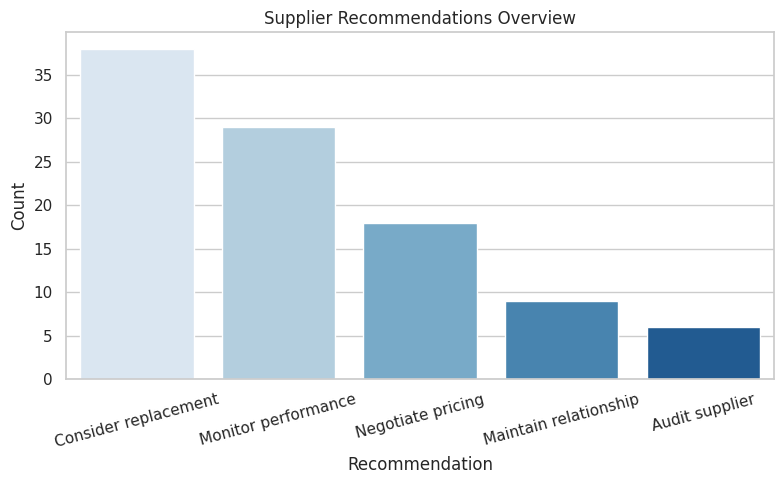

In [99]:
# Count recommendations
recommendation_counts = df['recommendation'].value_counts().reset_index()
recommendation_counts.columns = ['Recommendation', 'Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=recommendation_counts, x='Recommendation', y='Count', hue='Recommendation', palette='Blues')
plt.title('Supplier Recommendations Overview')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Most suppliers are recommended for replacement or monitoring, highlighting risk concerns.

Few require pricing negotiation, and only a handful need auditing or relationship maintenance.

## Conclusion

We analyzed supplier data to group similar suppliers and assess their risks. This helped us understand which suppliers are reliable and which ones need attention. Based on this, we gave clear actions like replacing, monitoring, or keeping good suppliers.

Most suppliers fall into medium to high risk categories, with Chennai suppliers showing the highest average risk.

> Smarter supplier decisions and better risk control.